[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/storopoli/ciencia-de-dados/master?filepath=notebooks%2FAula_8_pandas_estatistica.ipynb)

In [1]:
# Para mostrar as imagens com DPI de alta qualidade
%matplotlib inline
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300

# `pandas` estatística

**Objetivo**: Apresentar o que é estatística pela biblioteca pandas. Abordar quantis, média, mediana, desvio padrão, assimetria, curtose, correlação, covariância.

# Estatística

* média
* mediana
* moda
* desvio padrão
* quantis
* assimetria
* curtose
* correlação
* covariância

## Média

Valor central de um conjunto discreto de números. Especificamente, a soma dos números divido pela quantidade de números. Geralmente média é denominada como $\bar{x}$ ou a letra grega $\mu$.

$\bar{x}=\frac{1}{n}\left(\sum_{i=1}^{n} x_{i}\right)=\frac{x_{1}+x_{2}+\cdots+x_{n}}{n}$

## Mediana

Valor que separa a metade maior e a metade menor de uma amostra, uma população ou uma distribuição de probabilidade. Num conjunto de dados, pode ser pensada como o valor do "meio".

$\operatorname{mediana}(a)=\frac{a_{\lfloor (\# a+1) \div 2 \rfloor} + a_{\lceil (\# a+1) \div 2 \rceil}}{2}$,

onde $a$ é um lista ordenada de números, $\#a$ o comprimento dessa lista, $\lfloor . \rfloor$ o valor arredondado para baixo, $\lceil . \rceil$ o valor arredondado para cima.


## Moda

Valor mais frequente de uma amostra, uma população, ou uma distribuição de probabilidade.

<img src="images/media_mediana_moda.png" alt="media-mediana-moda" style="width: 300px;"/>

<img src="images/renda-media-mediana.png" alt="renda-media-mediana" style="width: 600px;"/>

## Desvio Padrão

Medida de quanto variação ou disperção um conjunto de valores possui. Geralmente representada com a letra gregra $\sigma$. É a raiz quadrada da soma dos desvios (em relação à media - $x_i - \bar{x}$) de uma amostra dívido pelo número total da amostra menos um ($N-1$).

$\sigma = \sqrt{\frac{\sum_{i=1}^{N}\left(x_{i}-\bar{x}\right)^{2}}{N-1}}$

É importante porque, **em uma distribuição normal**, os intervalos contém um percentual da população

* $\mu \pm 1 \times \sigma \approx 68\%$
* $\mu \pm 2 \times \sigma \approx 95\%$
* $\mu \pm 3 \times \sigma \approx 69\%$


<img src="images/desvio_padrão.png" alt="desvio_padrão" style="width: 600px;"/>

## Distribuição Normal

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

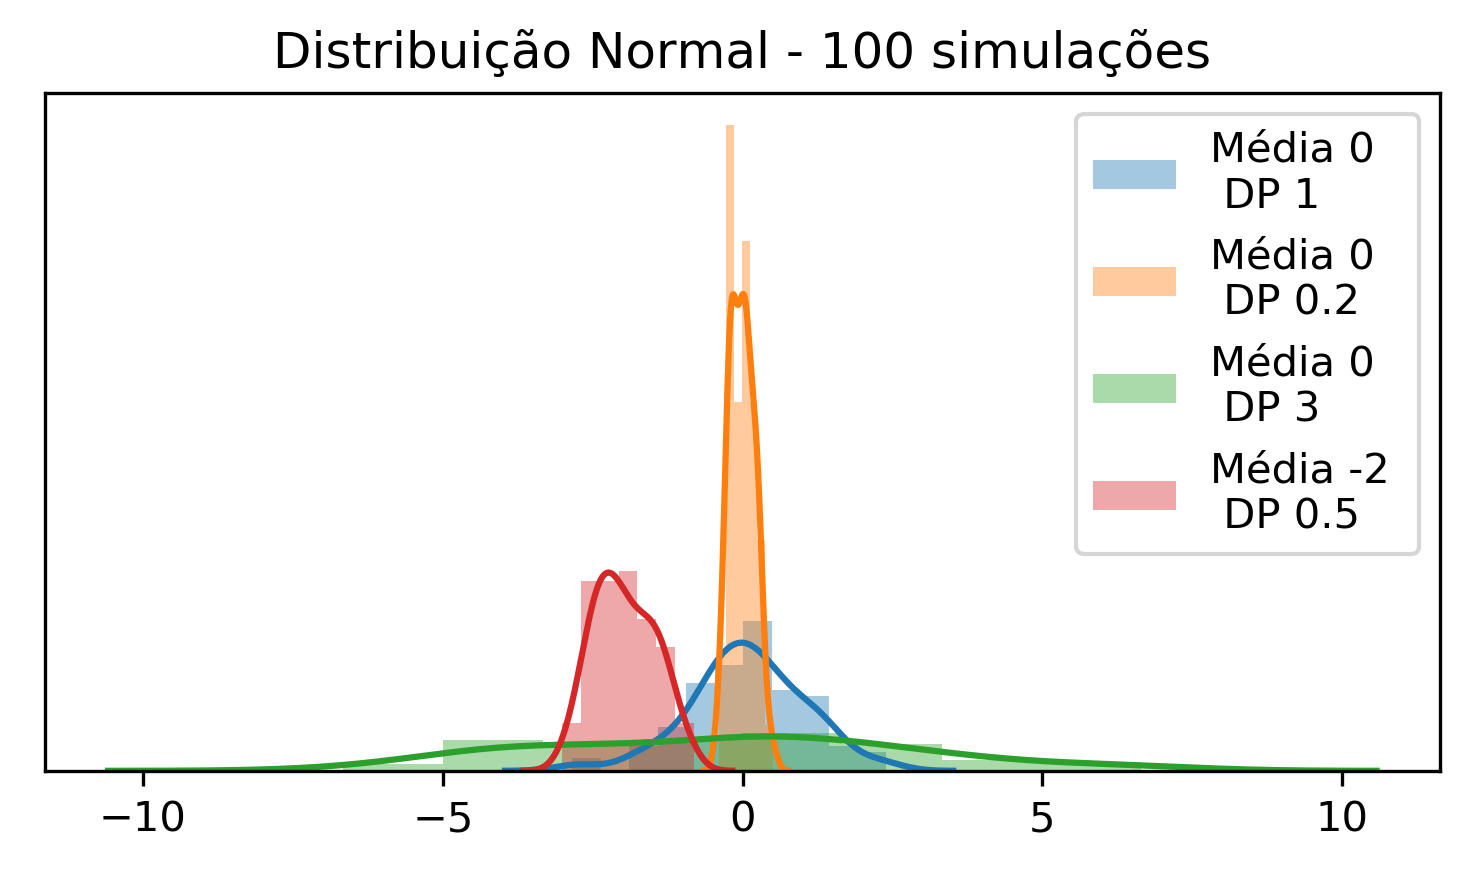

In [8]:
f, axes = plt.subplots(1, 1, figsize=(5, 3), sharex=True)
size = 100
for mean, std in [(0, 1), (0, 0.2), (0, 3), (-2, 0.5)]:
    data = norm.rvs(mean, std, size=size)
    sns.distplot(data, label=f"Média {mean} \n DP {std}")

title = f"Distribuição Normal - {size} simulações"
plt.title(title)
axes.legend()
plt.setp(axes, yticks=[])
plt.tight_layout()

## Quantis / Percentis

## Assimetria

<img src="images/assimetria.jpg" alt="assimetria" style="width: 600px;"/>

## Curtose

<img src="images/curtose.png" alt="curtose" style="width: 600px;"/>

In [ ]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset("iris")

## Dataset [*Iris*](https://en.wikipedia.org/wiki/Iris_flower_data_set)

Edgar Anderson coletou os dados para quantificar a variação morfológica das flores de íris de três espécies relacionadas.

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris  (Setosa, Virginica e Iris Versicolor). Quatro características foram medidas em cada amostra (cm):

* comprimento das sépalas
* largura  das sépalas
* comprimento das pétalas
* largura das pétalas

![iris-sepals-petals](https://thegoodpython.com/assets/images/iris-species.png)

## Correlação e Covariância

In [ ]:
sns.pairplot(iris, hue='species')

![pandas-groupby](https://static.packt-cdn.com/products/9781783985128/graphics/5128OS_09_01.jpg)

| Nome da Função       | Descrição                            |
| -------------------  | ------------------------------------ |
| `count()`            | Número de valores não-NA             |
| `sum()`              | Soma de valores não-NA               |
| `mean()`             | Média de valores não-NA              |
| `median()`           | Mediana Aritmética de valores não-NA |
| `std()`              | Desvio padrão de valores não-NA      |
| `min()`, `max()`     | Mínimo e Máximo de valores não-NA    |
| `first()`, `last()`  | Primeiro e Último de valores não-NA  |